In [14]:
import sire as sr
import glob
import numpy as np
import matplotlib.pyplot as plt

from multiprocessing import Pool

import logging
from rdkit import rdBase

INFO:rdkit:Enabling RDKit 2023.09.4 jupyter extensions


In [15]:
dihedral = "1_2_3_4"
seed_no = 4
fragment = 1

n_cpus = 26

In [ ]:
n_confs = 50 # number of conformers scanned
conf_numbers = np.arange(0,n_confs-1).tolist()

In [17]:
idx1, idx2, idx3, idx4 = map(int, dihedral.split("_"))
print(idx1,idx2,idx3,idx4)

1 2 3 4


In [18]:
forward = np.arange(-180,190,10).tolist()
energies_per_dihedral = []

Getting the energy of the molecule minus the energy of the torsion to be optimised

In [19]:
# Set RDKit logger level to WARNING or ERROR
rdBase.LogToPythonStderr()
logger = logging.getLogger("rdkit")
logger.setLevel(logging.ERROR)  # or logging.WARNING

from IPython.display import display, HTML

display(HTML("""
<style>
.output_subarea.output_javascript_error {
    display: none !important;
}
</style>
"""))


def compute_mm_energies(dihe):
    print(f'{dihe}'+"\n")
    mm_energies = []
    
    file_patterns_prmtop = [
        'profiles_torsions/optimised_geometries/fragment%s/torsion%s/torsion%s_seed%s_conf%s_dihe_%s*_resp_charges_atomtypes_renamed.mol2.prmtop' % 
        (fragment, dihedral, dihedral, seed_no, conf, dihe) for conf in conf_numbers
    ]
    
    file_patterns_inpcrd = [
        'profiles_torsions/optimised_geometries/fragment%s/torsion%s/torsion%s_seed%s_conf%s_dihe_%s*_resp_charges_atomtypes_renamed.mol2.inpcrd' % 
        (fragment, dihedral, dihedral, seed_no, conf, dihe) for conf in conf_numbers
    ]

    file_list_prmtop = []
    file_list_inpcrd = []

    for pattern_prmtop, pattern_inpcrd in zip(file_patterns_prmtop, file_patterns_inpcrd):
        file_list_prmtop.extend(glob.glob(pattern_prmtop))
        file_list_inpcrd.extend(glob.glob(pattern_inpcrd))

    for fle in file_list_inpcrd:
        mol = sr.load(file_list_prmtop[0], fle)
        mm_energies.append(mol.energy().value())  # energies in kcal/mol

    return mm_energies

if __name__ == '__main__':
    with Pool(processes=n_cpus):  
        energies_per_dihedral = Pool(n_cpus).map(compute_mm_energies, forward)


-130
-30
-50
-120
-180
-150
-160
-10
-140
-20
-110
-170
0
-100
20
-90
-40
-60
-70
-80



70
40


10

60








30




50








80



90

100

110

120

130

140

150
160


170

180



In [28]:
# optional: load one of the mol2 files from the QM scans to check the torsion potential expression for the torsion under study
# or any other torsion (e.g. 2-3-4-5)

mol = sr.load(
    "profiles_torsions/optimised_geometries/fragment%s/torsion%s/torsion%s_seed4_conf0_dihe_-90_2_forward_resp_charges_atomtypes_renamed.mol2.prmtop" % (fragment, dihedral, dihedral),
    "profiles_torsions/optimised_geometries/fragment%s/torsion%s/torsion%s_seed4_conf0_dihe_-90_2_forward_resp_charges_atomtypes_renamed.mol2.inpcrd" % (fragment, dihedral, dihedral)
)

In [29]:
torsion = mol.dihedrals(f"atomnum {idx1}", f"atomnum {idx2}", f"atomnum {idx3}", f"atomnum {idx4}")
torsion.potentials()

[0.11 cos(phi) + 0.13 cos(3 phi) + 0.29 cos(2 phi - 3.14159) + 0.53]

In [31]:
torsion = mol.dihedrals(f"atomnum {2}", f"atomnum {3}", f"atomnum {4}", f"atomnum {5}")
torsion.potentials()

[0.155556 cos(3 phi) + 0.155556]

In [20]:
energies_per_dihedral

[[],
 [2.3999650952615212, 2.382647288554592, 2.357148138461925],
 [2.981949579970418, 2.8745393732990667, 2.974375296591406],
 [3.6005551415737003, 3.6524853663909984, 3.6943903532016096],
 [4.307163803260308, 4.295404584959036, 4.340293336876417],
 [4.713700497867331, 4.734005270223989, 4.787496637213504],
 [4.723090675639929, 4.646823257137214, 4.729527540615549],
 [4.308425081534272, 4.400460147014607, 4.371315629106534],
 [3.8969607138891003, 3.9220845977521037, 3.8532566713245684],
 [3.7624072257073906, 3.678761643929971, 3.8051532935974337],
 [3.854773707852292, 3.813607456223182, 3.7943882979774046],
 [4.09211775723071, 4.09211775723071, 4.003642432000349, 3.9704122735179483],
 [4.431398525457884, 4.435417311176213, 4.4054215320695045],
 [4.831670239210991, 4.9353725178344545, 4.898363746971221],
 [5.510577326661158, 5.490076089613384, 5.565973022032445],
 [6.374178681924279, 6.299396619670619, 6.230134278070732],
 [6.992849437744971, 6.9911146025549495, 7.00489869257974],
 [3.

In [24]:
avg_energy_per_dihedral = [] # saving average energy per dihedral for all conformers

for i in energies_per_dihedral: 
    avg_energy_per_dihedral.append(np.mean(i))

avg_energy_per_dihedral

/home/eva/anaconda3/envs/openbiosim/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/eva/anaconda3/envs/openbiosim/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[nan,
 2.3799201740926796,
 2.943621416620297,
 3.649143620388769,
 4.314287241698588,
 4.745067468434941,
 4.69981382446423,
 4.360066952551804,
 3.890767327655258,
 3.7487740544115984,
 3.8209231540176263,
 4.03957255499493,
 4.4240791229012,
 4.888468834672222,
 5.522208812768995,
 6.30123652655521,
 6.996287577626553,
 5.664644250872892,
 7.48451700131422,
 5.8317012959283545,
 6.110649869296862,
 5.100642081385057,
 4.076486004515441,
 3.292217985971965,
 2.862162996758555,
 2.9407204532558673,
 3.4283905292988717,
 4.068528663923677,
 4.669212139543517,
 5.067146460063166,
 5.094075990130584,
 4.6968594820005265,
 3.9881009559617353,
 3.188363074780195,
 2.4928360721670533,
 2.0670308305661123,
 1.986666433217525]

In [ ]:
# normalise average energy and check if values for -180 and 180 are missing (usually -180 is always missing)

norm_avg_energy_per_dihedral = []

if energies_per_dihedral[0] == []:
    for enrg in avg_energy_per_dihedral[1:]: 
        norm_avg_energy_per_dihedral.append(enrg-np.min(avg_energy_per_dihedral[1:]))

elif energies_per_dihedral[0] == [] and energies_per_dihedral[-1] == []:
    for enrg in avg_energy_per_dihedral[1:-1]: 
        norm_avg_energy_per_dihedral.append(enrg-np.min(avg_energy_per_dihedral[1:-1]))


36

In [32]:
np.save('profiles_torsions/individual_conformer_scans/fragment%s/torsion%s/torsion%s_seed%s_mm.npy' % (fragment, dihedral, dihedral, seed_no), norm_avg_energy_per_dihedral)

/home/eva/anaconda3/envs/openbiosim/lib/python3.11/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/eva/anaconda3/envs/openbiosim/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


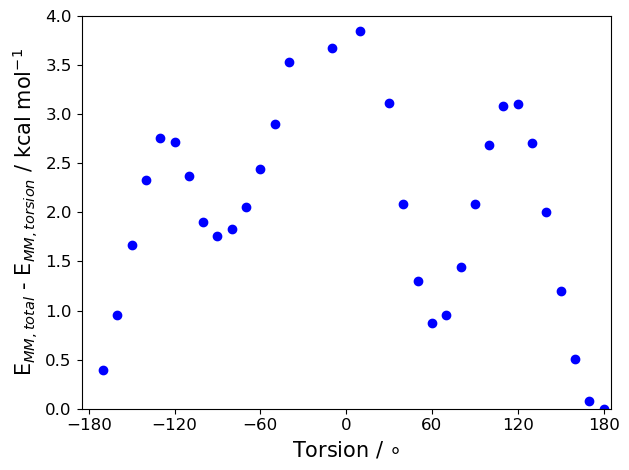

In [ ]:
import matplotlib.pyplot as plt
forward = list(range(-170, 181, 10)) # here -180 has been excluded as no MM energy was available, modify according to your data
idx = 0
for i in norm_avg_energy_per_dihedral:
    plt.plot(forward[idx], i, marker='o', linestyle='None', color='blue')
    idx += 1

plt.xlabel('Torsion / $\circ$', fontsize=15)
plt.ylabel('E$_{MM,total}$ - E$_{MM,torsion}$ / kcal mol$^{-1}$', fontsize=15)

plt.xticks(range(-180, 181, 60), fontsize=12) 
plt.yticks(fontsize=12) 

plt.xlim(-185, 185)
plt.ylim(0.0,4.0)
plt.rcParams['figure.dpi'] = 300
plt.tight_layout()
plt.show()
